# English datasets

In [ ]:
import kagglehub

# Download latest version
first_eng_path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

print("Path to dataset files:", first_eng_path)

Path to dataset files: /kaggle/input/fake-or-real-news


In [ ]:
import os
first_eng_dir=os.listdir(first_eng_path)
print(first_eng_dir)

['fake_or_real_news.csv']


In [ ]:
import pandas as pd
first_eng_df=pd.read_csv(os.path.join(first_eng_path,'fake_or_real_news.csv'))
first_eng_df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
first_eng_df.drop(columns=['title'],inplace=True)
first_eng_df.loc[first_eng_df["label"] == "REAL", "label"] = 1
first_eng_df.loc[first_eng_df["label"] == "FAKE", "label"] = 0
first_eng_df.head()

,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,It's primary day in New York and front-runners...,1


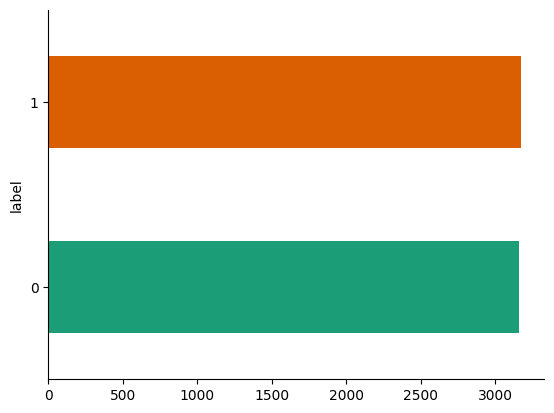

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
first_eng_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
first_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   text        6335 non-null   object
 2   label       6335 non-null   object
dtypes: int64(1), object(2)
memory usage: 148.6+ KB


In [ ]:
import numpy as np
# print(first_eng_df.isnull().sum())
print(np.unique(first_eng_df['label']))
print(np.unique(first_eng_df['label'].value_counts()))

[0 1]
[3164 3171]


In [ ]:
import kagglehub

# Download latest version
sec_eng_path = kagglehub.dataset_download("evilspirit05/english-fake-news-dataset")

print("Path to dataset files:", sec_eng_path)

Path to dataset files: /kaggle/input/english-fake-news-dataset


In [ ]:
sec_eng_dir=os.listdir(sec_eng_path)
print(sec_eng_dir)

['final_en.csv']


In [ ]:
import pandas as pd
sec_eng_df=pd.read_csv(os.path.join(sec_eng_path,'final_en.csv'))
sec_eng_df.head()


,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
sec_eng_df.drop(columns=['title'],inplace=True)
sec_eng_df.rename(columns={'lebel': 'label'},inplace=True)

sec_eng_df.head()


,text,label
0,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"Well, sad to say, it s a sure chance the next ...",0
3,"SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,WASHINGTON (Reuters) - President Donald Trump ...,1


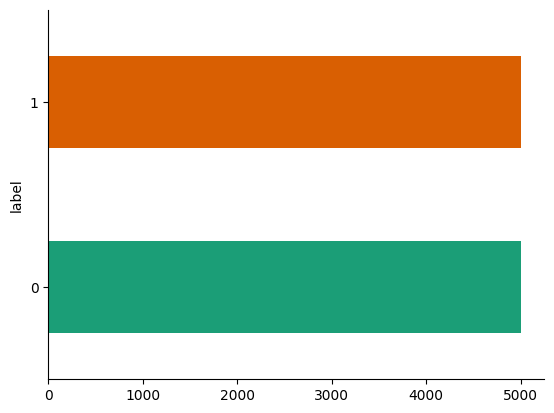

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sec_eng_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np
# sec_eng_df.info()
# print(first_eng_df.isnull().sum())
print(np.unique(sec_eng_df['label']))
print(np.unique(sec_eng_df['label'].value_counts()))
#5000 means same value in 0 and 1

[0 1]
[5000]


In [ ]:
print(sec_eng_df.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
pip install pandas nltk contractions emoji

In [ ]:
import re
import numpy as np
import string
import pandas as pd
import nltk
import contractions
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# STEMMER      = PorterStemmer()
LEMMATIZER   = WordNetLemmatizer()
DEFAULT_SW   = set(stopwords.words('english'))

# ── Define words to retain (negations, modals, conditionals, temporal markers)
RETAIN_SW = {
    'not', 'no', 'never',
    'if', 'whether',
    'when', 'before', 'after',
    'could', 'might', 'would', 'should', 'may', 'must'
}

# ── Build the final stopword set ────────────────────────────────────────────────
CUSTOM_SW = {w for w in DEFAULT_SW if w not in RETAIN_SW}

def _clean_text(text: str) -> str:
    text = text.lower()  # lowercase
    text = contractions.fix(text)  # expand contractions
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)               # remove @handles & #tags
    text = emoji.demojize(text, delimiters=(" ", " "))  # emojis bt7awelo l text
    # remove punctuation except ? and !
    punctuation = string.punctuation.replace('?', '').replace('!', '')
    text = text.translate(str.maketrans('', '', punctuation))

    tokens = word_tokenize(text)  # tokenize
    # filter stopwords but keep semantic cues

    #lemmatization
    # stems  = [STEMMER.stem(t) for t in tokens]
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in CUSTOM_SW]
    lemmas = [LEMMATIZER.lemmatize(t, pos='v') for t in tokens]
    return ' '.join(lemmas)


def preprocess_df(df: pd.DataFrame, text_col: str, new_col: str = 'clean_text') -> pd.DataFrame:
    df = df.copy()
    df[new_col] = df[text_col].astype(str).apply(_clean_text)
    # print( df[new_col].str.count('!'))
    # print(df[new_col].str.count(r'\?'))
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_tfidf_vectorizers(df, text_col='clean_text', max_features=5000):
    vectorizers = {}

    # Unigram only
    vectorizers['unigram'] = TfidfVectorizer(ngram_range=(1,1), max_features=max_features)
    X_unigram = vectorizers['unigram'].fit_transform(df[text_col])

    # Bigram only
    vectorizers['bigram'] = TfidfVectorizer(ngram_range=(2,2), max_features=max_features)
    X_bigram = vectorizers['bigram'].fit_transform(df[text_col])

    # Unigram + bigram
    vectorizers['unigram_bigram'] = TfidfVectorizer(ngram_range=(1,2), max_features=max_features)
    X_unigram_bigram = vectorizers['unigram_bigram'].fit_transform(df[text_col])

    # Trigram only
    vectorizers['trigram'] = TfidfVectorizer(ngram_range=(3,3), max_features=max_features)
    X_trigram = vectorizers['trigram'].fit_transform(df[text_col])

    # Unigram + bigram + trigram
    vectorizers['all_ngrams'] = TfidfVectorizer(ngram_range=(1,3), max_features=max_features)
    X_all_ngrams = vectorizers['all_ngrams'].fit_transform(df[text_col])

    return vectorizers, {
        'unigram': X_unigram,
        'bigram': X_bigram,
        'unigram_bigram': X_unigram_bigram,
        'trigram': X_trigram,
        'all_ngrams': X_all_ngrams,
    }

ImportError: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.11/dist-packages/numpy/_core/umath.py)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize_and_pad(df: pd.DataFrame, text_col: str, max_words=10000, max_len=100):
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(df[text_col])
    sequences = tokenizer.texts_to_sequences(df[text_col])
    padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
    return tokenizer, padded

In [ ]:
import pandas as pd
df1 = preprocess_df(first_eng_df, 'text')

df2 = preprocess_df(sec_eng_df, 'text')

In [ ]:
# used for ML
vectorizers, FR_vectors = create_tfidf_vectorizers(df1, 'clean_text')
vectorizers, SC_vectors = create_tfidf_vectorizers(df2, 'clean_text')

In [ ]:
#used for DL(CNN,LSTM,RGU)
tokenizer1, padded1 = tokenize_and_pad(df1, 'clean_text')
tokenizer2, padded2 = tokenize_and_pad(df2, 'clean_text')

In [ ]:
print(df1)
print(df2)
print("first datset",padded1.shape)
print("second dataset",padded2.shape)

      Unnamed: 0                                               text label  \
0           8476  Daniel Greenfield, a Shillman Journalism Fello...     0   
1          10294  Google Pinterest Digg Linkedin Reddit Stumbleu...     0   
2           3608  U.S. Secretary of State John F. Kerry said Mon...     1   
3          10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...     0   
4            875  It's primary day in New York and front-runners...     1   
...          ...                                                ...   ...   
6330        4490  The State Department told the Republican Natio...     1   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...     0   
6332        8622   Anti-Trump Protesters Are Tools of the Oligar...     0   
6333        4021  ADDIS ABABA, Ethiopia —President Obama convene...     1   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...     1   

                                             clean_text  
0     daniel gree

In [ ]:
print(padded1)

[[3745    1    1 ...  592 3392  436]
 [1851 6435    1 ...  274  243  667]
 [  54  212    9 ...  623  276  142]
 ...
 [2415 1050 1504 ...  173    2  662]
 [   1    1 4914 ...    3 2311  719]
 [ 729  120 2131 ...  315   46  117]]


Machine Learning Techniques

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM (LinearSVC)': LinearSVC(),
        'Multinomial NB': MultinomialNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100),
         'Bernoulli NB': BernoulliNB()
    }

    model_scores = {}

    for name, model in models.items():
        print(f"\n===== {name} =====")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        model_scores[name] = acc
        print("Accuracy:", acc)
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    return model_scores


In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   text        6335 non-null   object
 2   label       6335 non-null   int64 
 3   clean_text  6335 non-null   object
dtypes: int64(2), object(2)
memory usage: 198.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10000 non-null  object
 1   label       10000 non-null  int64 
 2   clean_text  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
# visualizing accuracy
def plot_model_scores(score_dict, title):
    plt.figure(figsize=(10, 5))
    names = list(score_dict.keys())
    scores = list(score_dict.values())
    sns.barplot(x=names, y=scores)
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()


Training models on UNIGRAM features (df1)

===== Logistic Regression =====
Accuracy: 0.9187056037884768
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       628
           1       0.92      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:


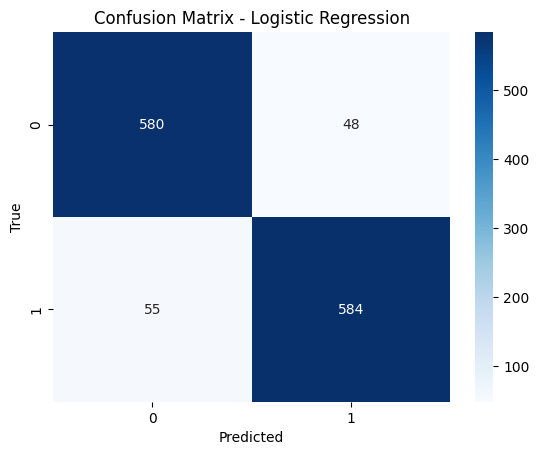


===== SVM (LinearSVC) =====
Accuracy: 0.9337016574585635
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion Matrix:


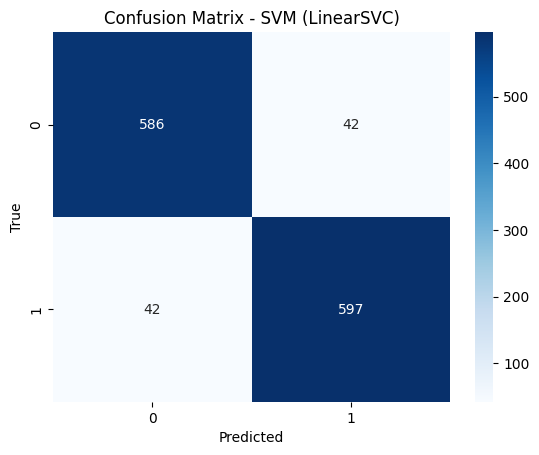


===== Multinomial NB =====
Accuracy: 0.8926598263614838
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       628
           1       0.91      0.87      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267

Confusion Matrix:


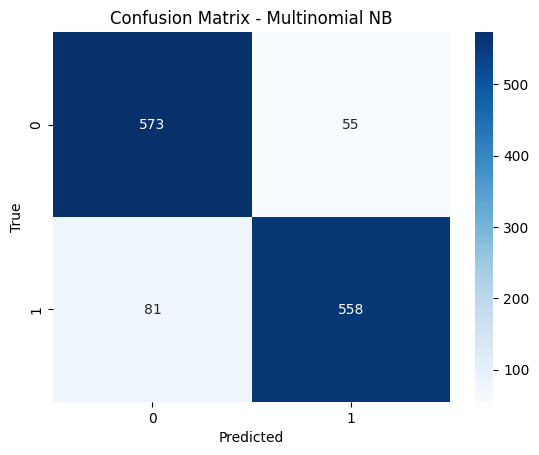


===== Random Forest =====
Accuracy: 0.9131807419100236
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       628
           1       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:


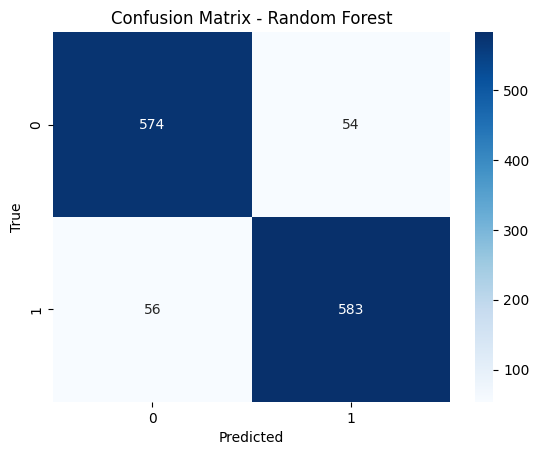


===== XGBoost =====


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9289660615627466
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       628
           1       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion Matrix:


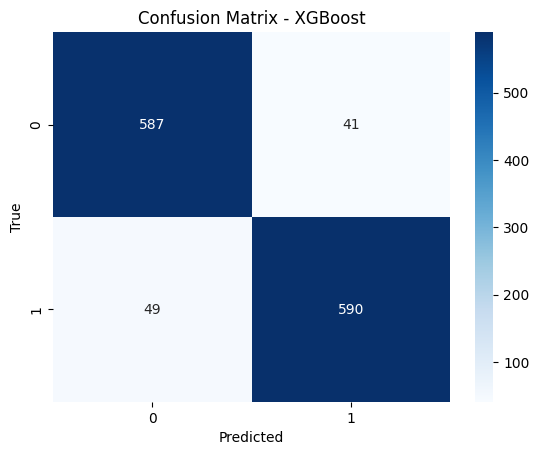

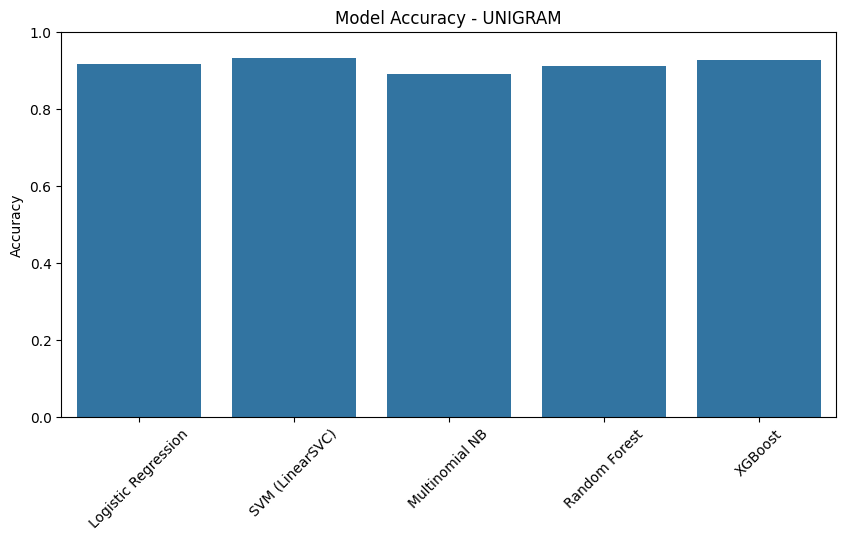

Training models on BIGRAM features (df1)

===== Logistic Regression =====
Accuracy: 0.9123914759273876
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       628
           1       0.93      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:


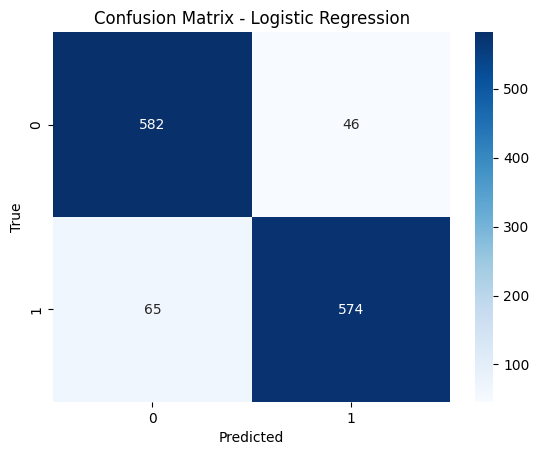


===== SVM (LinearSVC) =====
Accuracy: 0.9123914759273876
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       628
           1       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:


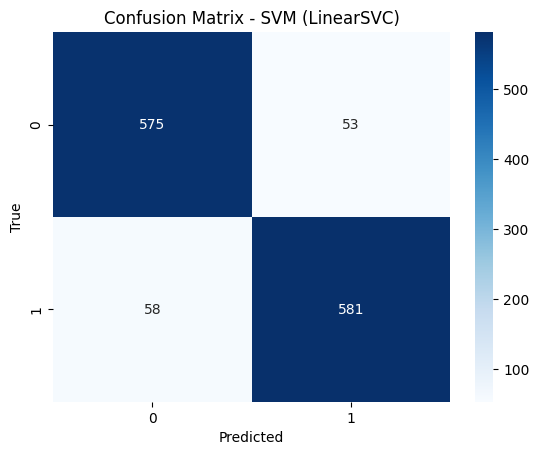


===== Multinomial NB =====
Accuracy: 0.8958168902920284
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       628
           1       0.91      0.88      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

Confusion Matrix:


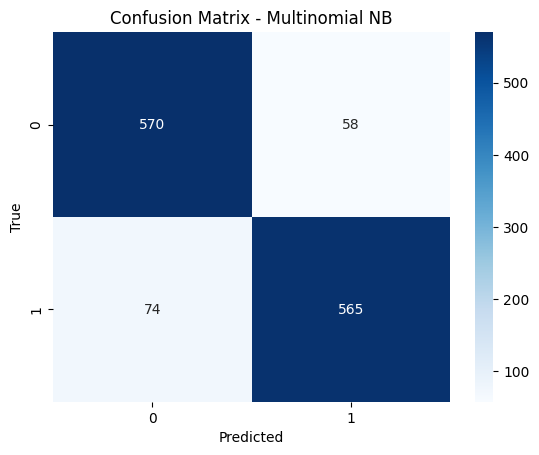


===== Random Forest =====
Accuracy: 0.89344909234412
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       628
           1       0.89      0.90      0.90       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267

Confusion Matrix:


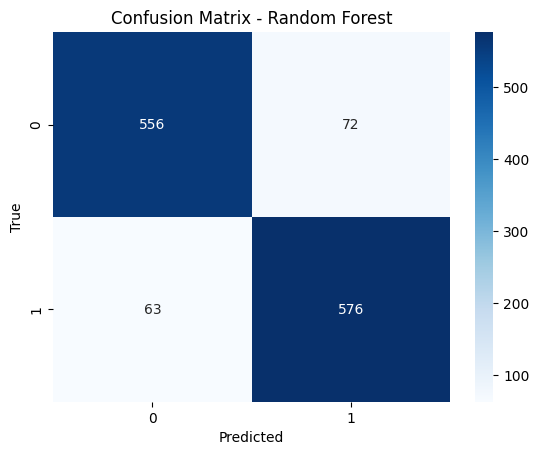


===== XGBoost =====


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:18:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8887134964483031
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       628
           1       0.91      0.86      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267

Confusion Matrix:


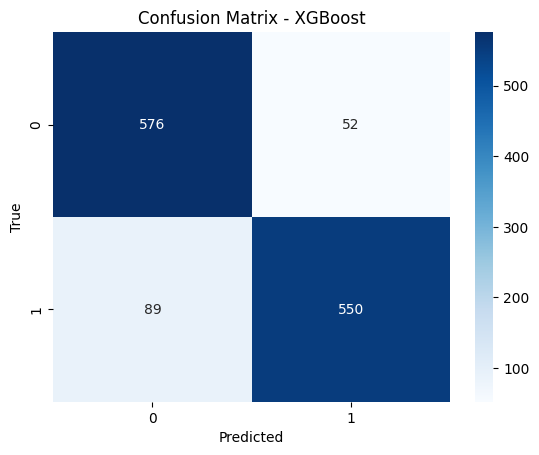

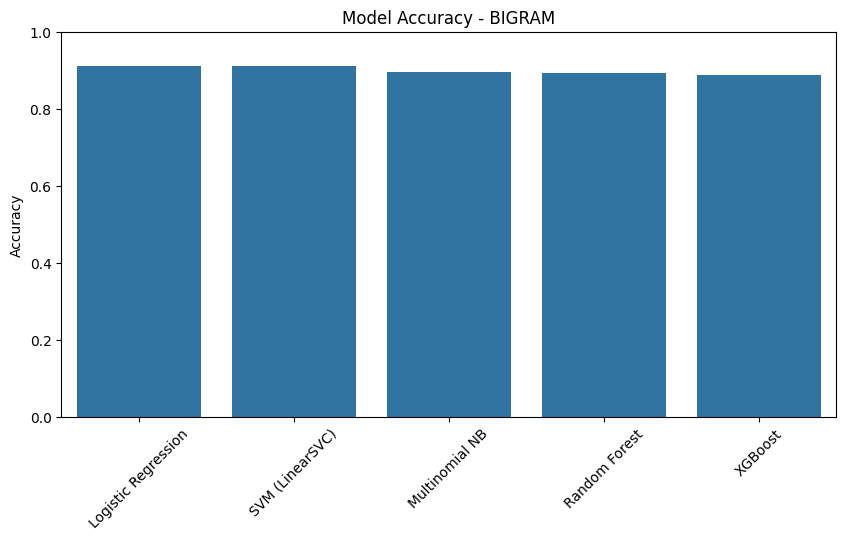

Training models on UNIGRAM + BIGRAM features (df1)

===== Logistic Regression =====
Accuracy: 0.9226519337016574
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       628
           1       0.93      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:


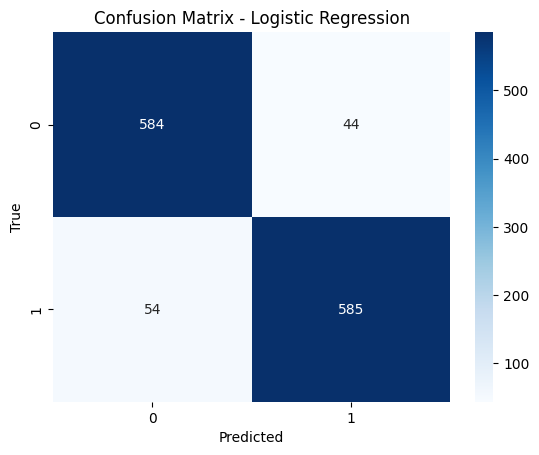


===== SVM (LinearSVC) =====
Accuracy: 0.9352801894238358
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       628
           1       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

Confusion Matrix:


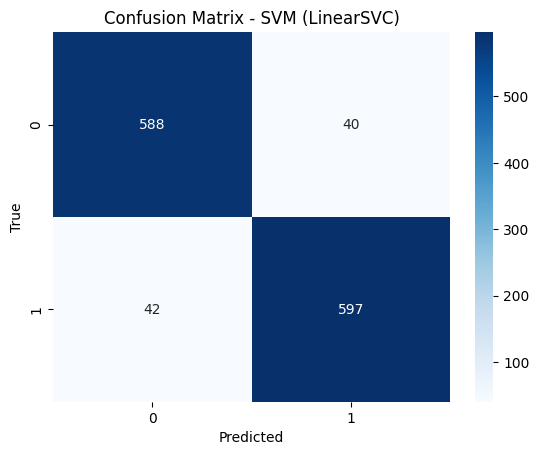


===== Multinomial NB =====
Accuracy: 0.8966061562746646
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       628
           1       0.92      0.87      0.89       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

Confusion Matrix:


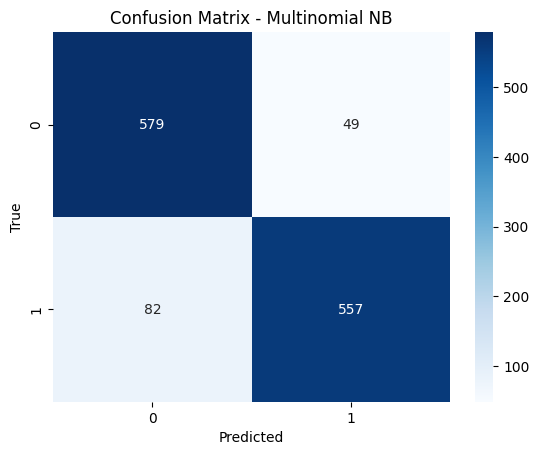


===== Random Forest =====
Accuracy: 0.9226519337016574
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       628
           1       0.93      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:


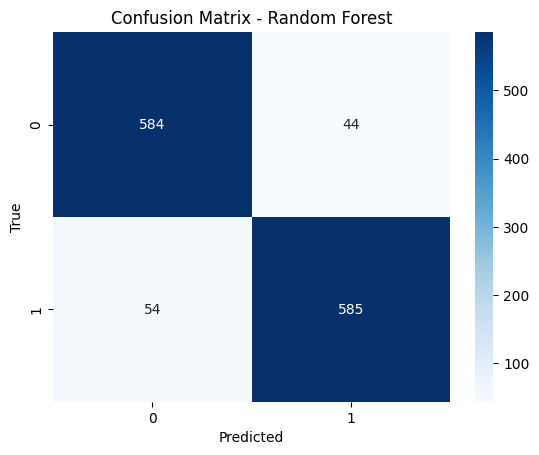


===== XGBoost =====


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9337016574585635
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       628
           1       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion Matrix:


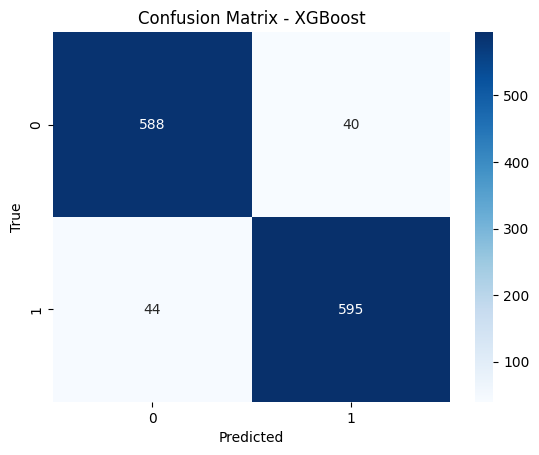

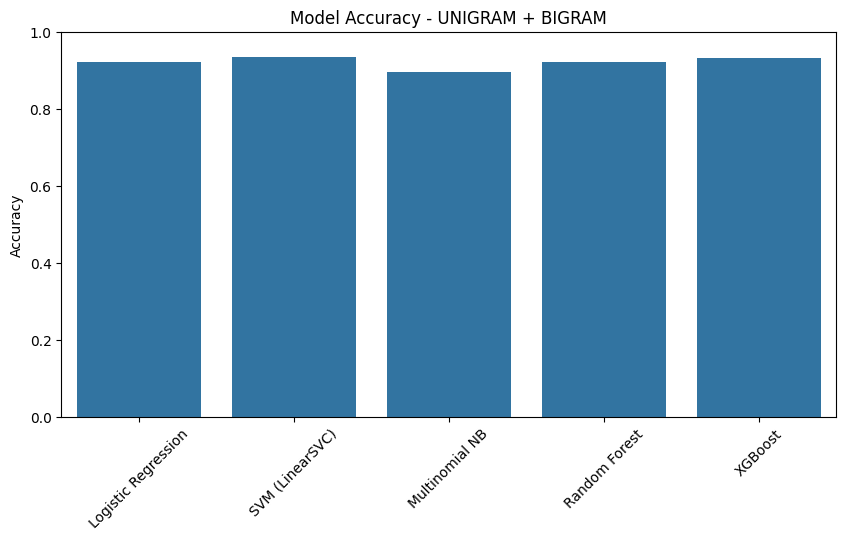

Training models on TRIGRAM features (df1)

===== Logistic Regression =====
Accuracy: 0.8713496448303079
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       628
           1       0.90      0.83      0.87       639

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

Confusion Matrix:


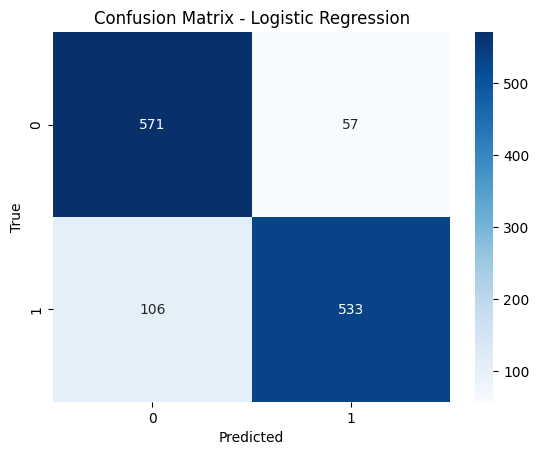


===== SVM (LinearSVC) =====
Accuracy: 0.8642462509865825
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       628
           1       0.89      0.83      0.86       639

    accuracy                           0.86      1267
   macro avg       0.87      0.86      0.86      1267
weighted avg       0.87      0.86      0.86      1267

Confusion Matrix:


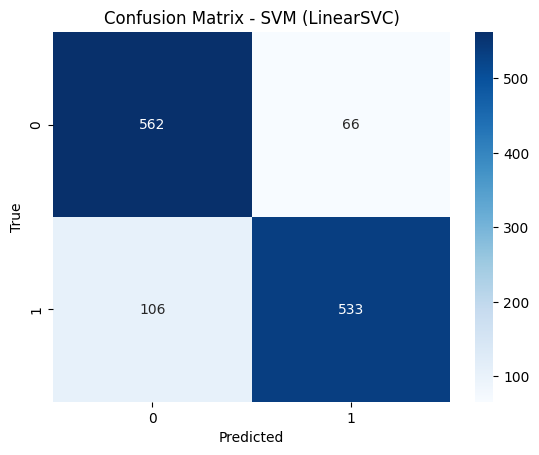


===== Multinomial NB =====
Accuracy: 0.8666140489344909
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       628
           1       0.85      0.89      0.87       639

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

Confusion Matrix:


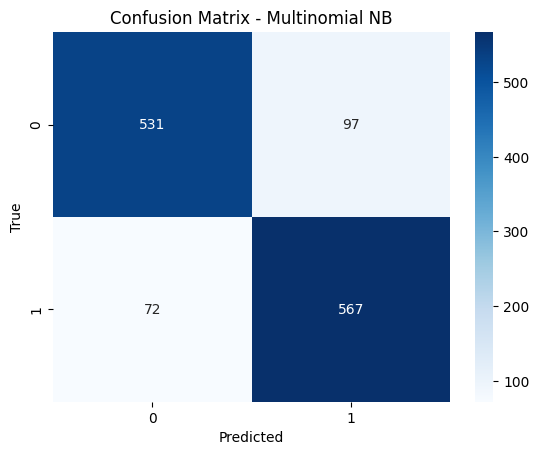


===== Random Forest =====
Accuracy: 0.8429360694554064
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       628
           1       0.90      0.78      0.83       639

    accuracy                           0.84      1267
   macro avg       0.85      0.84      0.84      1267
weighted avg       0.85      0.84      0.84      1267

Confusion Matrix:


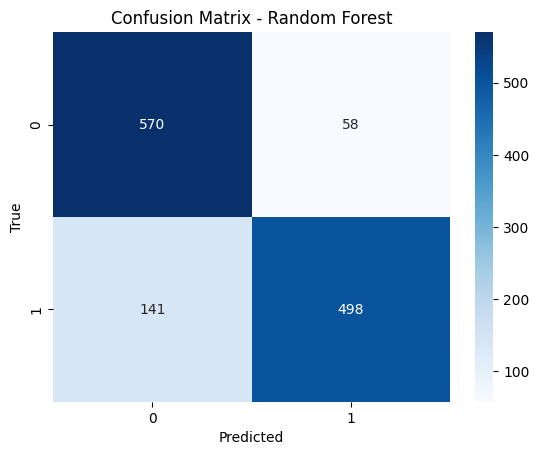


===== XGBoost =====


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8097868981846882
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       628
           1       0.91      0.69      0.79       639

    accuracy                           0.81      1267
   macro avg       0.83      0.81      0.81      1267
weighted avg       0.83      0.81      0.81      1267

Confusion Matrix:


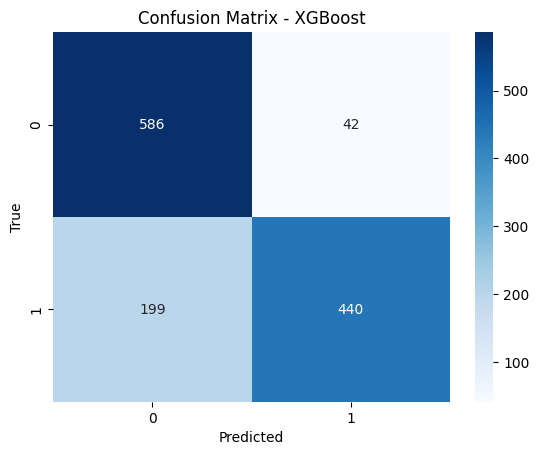

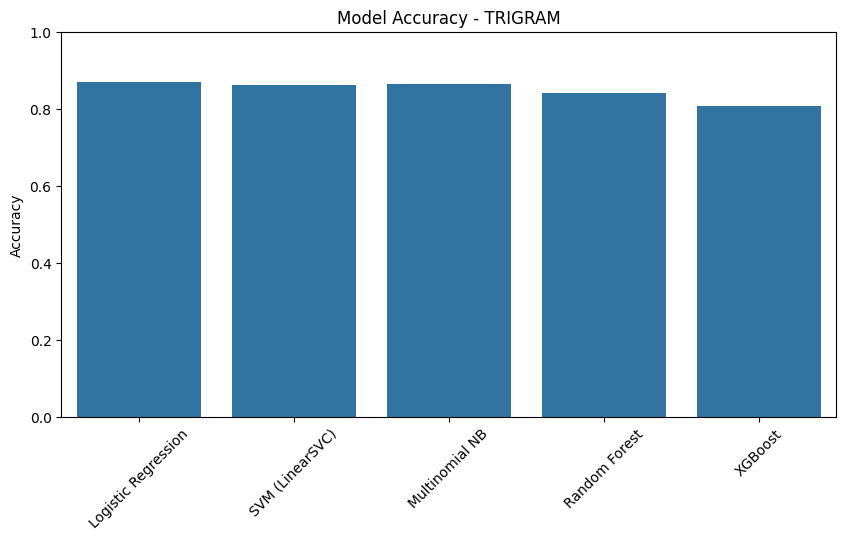

Training models on ALL_NGRAMS (df1)

===== Logistic Regression =====
Accuracy: 0.9234411996842936
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       628
           1       0.93      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:


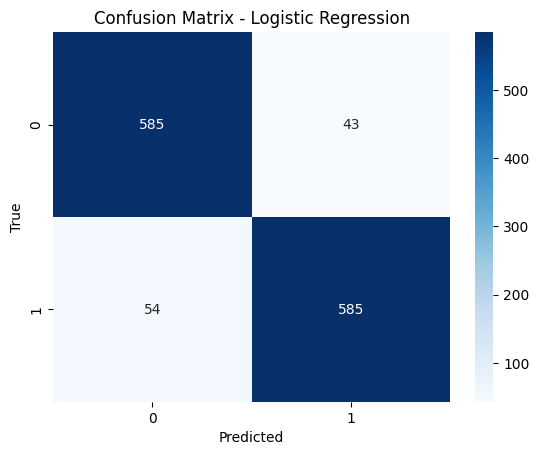


===== SVM (LinearSVC) =====
Accuracy: 0.9384372533543804
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       628
           1       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

Confusion Matrix:


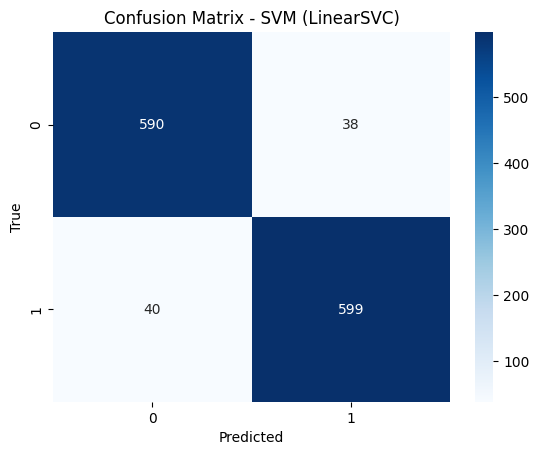


===== Multinomial NB =====
Accuracy: 0.8981846882399369
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       628
           1       0.92      0.87      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

Confusion Matrix:


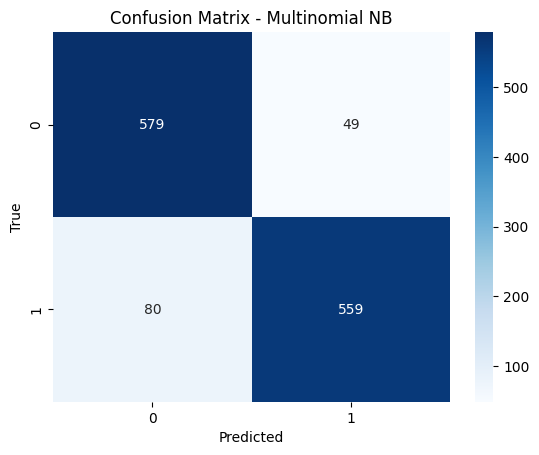


===== Random Forest =====
Accuracy: 0.9226519337016574
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       628
           1       0.93      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:


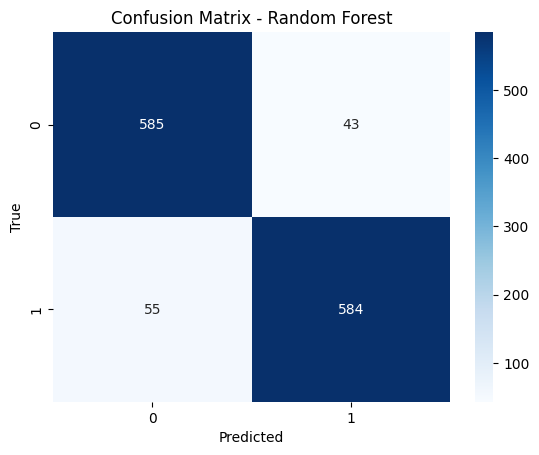


===== XGBoost =====


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9265982636148382
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       628
           1       0.93      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion Matrix:


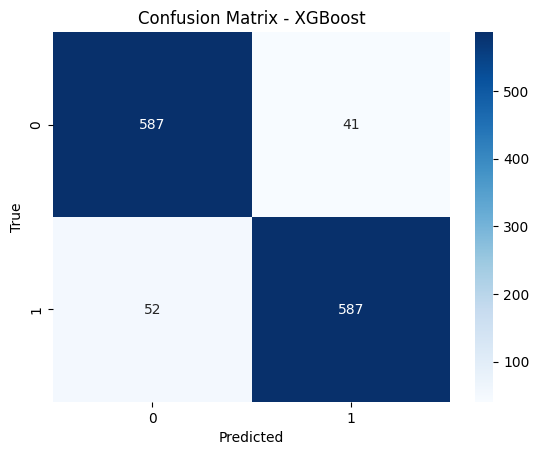

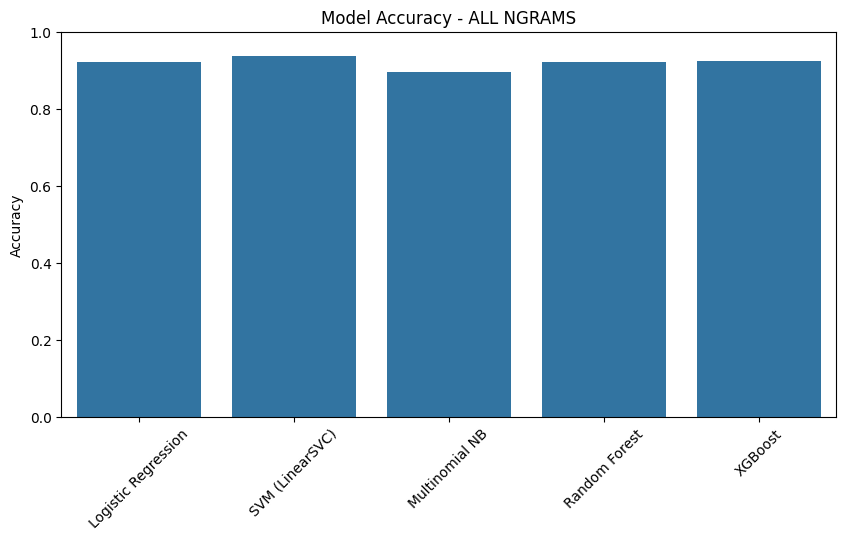

In [ ]:
#Train Models on df1
# Make sure label is int
df1['label'] = df1['label'].astype(int)

print("Training models on UNIGRAM features (df1)")
scores_unigram = train_and_evaluate_models(FR_vectors['unigram'], df1['label'])
plot_model_scores(scores_unigram, "Model Accuracy - UNIGRAM")

print("Training models on BIGRAM features (df1)")
scores_bigram = train_and_evaluate_models(FR_vectors['bigram'], df1['label'])
plot_model_scores(scores_bigram, "Model Accuracy - BIGRAM")

print("Training models on UNIGRAM + BIGRAM features (df1)")
scores_uni_bigram = train_and_evaluate_models(FR_vectors['unigram_bigram'], df1['label'])
plot_model_scores(scores_uni_bigram, "Model Accuracy - UNIGRAM + BIGRAM")

print("Training models on TRIGRAM features (df1)")
scores_trigram = train_and_evaluate_models(FR_vectors['trigram'], df1['label'])
plot_model_scores(scores_trigram, "Model Accuracy - TRIGRAM")

print("Training models on ALL_NGRAMS (df1)")
scores_all = train_and_evaluate_models(FR_vectors['all_ngrams'], df1['label'])
plot_model_scores(scores_all, "Model Accuracy - ALL NGRAMS")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Logistic Regression': {
        'C': [0.001,0.1, 1, 10],  # Regularization strength
        'solver': ['liblinear', 'saga'],  # Solvers to consider
    },
    'SVM (LinearSVC)': {
        'C': [0.1, 1, 10],  # Regularization strength
        'loss': ['hinge', 'squared_hinge'],  # Loss functions for SVM
    },
    'Multinomial NB': {
        'alpha': [0.001,0.01,0.1, 1, 10],  # Smoothing parameter
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],  # Number of trees
        'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
        'min_samples_split': [2, 5, 10],  # Min samples to split node
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1],  # Learning rate
        'n_estimators': [50, 100],  # Number of boosting rounds
        'max_depth': [3, 5],  # Maximum depth of tree
    }
}

In [ ]:
def grid_search_models(X, y):
    # Dictionary of models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM (LinearSVC)': LinearSVC(),
        'Multinomial NB': MultinomialNB(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    }

    # Perform GridSearchCV for each model
    for model_name, model in models.items():
        print(f"\nStarting GridSearch for {model_name}...")
        grid = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
        grid.fit(X, y)

        print(f"\nBest parameters for {model_name}: {grid.best_params_}")
        print(f"Best score for {model_name}: {grid.best_score_}")


In [ ]:

# For FR_vectors
print("Grid Search For FR_VECTORS")

print("Grid Search For UNIGRAM")
grid_search_models(FR_vectors['unigram'], df1['label'])
print("Grid Search For UNIGRAM_BIGRAM")
grid_search_models(FR_vectors['unigram_bigram'], df1['label'])
print("Grid Search For BIGRAM")
grid_search_models(FR_vectors['bigram'], df1['label'])
print("Grid Search For TRIGRAM")
grid_search_models(FR_vectors['trigram'], df1['label'])
print("Grid Search For ALL_NGRAMS")
grid_search_models(FR_vectors['all_ngrams'], df1['label'])

Grid Search For FR_VECTORS
Grid Search For UNIGRAM

Starting GridSearch for Logistic Regression...

Best parameters for Logistic Regression: {'C': 10, 'solver': 'saga'}
Best score for Logistic Regression: 0.9314917127071822

Starting GridSearch for SVM (LinearSVC)...

Best parameters for SVM (LinearSVC): {'C': 1, 'loss': 'hinge'}
Best score for SVM (LinearSVC): 0.9313338595106551

Starting GridSearch for Multinomial NB...

Best parameters for Multinomial NB: {'alpha': 0.001}
Best score for Multinomial NB: 0.8767166535122335

Starting GridSearch for Random Forest...


KeyboardInterrupt: 

In [ ]:
#Grid Search Heatmaps
seaborn.heatmap()

In [ ]:
#Save Best Models
import joblib
joblib.dump(best_model, 'best_model.pkl')


In [ ]:
#Combine preprocessing and modeling in one step:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train, y_train)


Deep Learning Techniques

In [ ]:
pip install tensorflow transformers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, GRU, Dense, Dropout
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional

# Constants
MAX_WORDS = 10000
MAX_LEN = 100
EMBEDDING_DIM = 100

# CNN Model
def build_cnn():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        LSTM(128),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# GRU Model
def build_gru():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        GRU(128),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#BiLSTM (Bidirectional LSTM)
def build_bilstm():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        Bidirectional(LSTM(128)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# BiGRU (Bidirectional GRU)

def build_bigru():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        Bidirectional(GRU(128)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
y_train = df1['label'].values  # For the first dataset
y_train2 = df2['label'].values  # For the second dataset

print("CNN MODEL")
cnnmodel = build_cnn()  # or build_lstm(), build_gru()
cnnmodel.fit(padded1, y_train, epochs=5, batch_size=32, validation_split=0.2)

print("LSTM MODEL")
lstmmodel = build_lstm()  # or build_lstm(), build_gru()
lstmmodel.fit(padded1, y_train, epochs=5, batch_size=32, validation_split=0.2)

print("GRU MODEL")
grumodel = build_gru()  # or build_lstm(), build_gru()
grumodel.fit(padded1, y_train, epochs=5, batch_size=32, validation_split=0.2)

print("BILSTM MODEL")
bilstm_model = build_bilstm()  # or build_lstm(), build_gru()
bilstm_model.fit(padded1, y_train, epochs=5, batch_size=32, validation_split=0.2)

print("BIGRU MODEL")
bigru_model = build_bigru()  # or build_lstm(), build_gru()
bigru_model.fit(padded1, y_train, epochs=5, batch_size=32, validation_split=0.2)
#print("BERT MODEL")
#bert_model = build_bert_model()
#bert_model.fit(
 #   [encoded['input_ids'], encoded['attention_mask']], y_train,
 #   epochs=3, batch_size=16, validation_split=0.1
#)

CNN MODEL
Epoch 1/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6402 - loss: 0.6230 - val_accuracy: 0.8816 - val_loss: 0.2759
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9265 - loss: 0.1934 - val_accuracy: 0.9155 - val_loss: 0.2139
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9875 - loss: 0.0548 - val_accuracy: 0.9108 - val_loss: 0.2313
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9990 - loss: 0.0135 - val_accuracy: 0.9163 - val_loss: 0.2543
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9155 - val_loss: 0.2761
LSTM MODEL
Epoch 1/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 32s 177ms/step - accuracy: 0.6411 - loss: 0.6347 - val_accuracy: 0.8516 - val_loss: 0.4129
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.8577 - loss: 0.3945 - val_accuracy: 0.8256 - val_loss: 0.4428
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - accuracy: 0.8194 - lo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# CNN model
print("CNN MODEL")
cnn_model = build_cnn()
history_cnn = cnn_model.fit(
    padded1, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# LSTM model
print("LSTM MODEL")
lstm_model = build_lstm()
history_lstm = lstm_model.fit(
    padded1, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# GRU model
print("GRU MODEL")
gru_model = build_gru()
history_gru = gru_model.fit(
    padded1, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# BiLSTM model
print("BiLSTM MODEL")
bilstm_model = build_bilstm()
history_bilstm = bilstm_model.fit(
    padded1, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# BiGRU model
print("BiGRU MODEL")
bigru_model = build_bigru()
history_bigru = bigru_model.fit(
    padded1, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


CNN MODEL
Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.6203 - loss: 0.6290 - val_accuracy: 0.8777 - val_loss: 0.2840
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9319 - loss: 0.1896 - val_accuracy: 0.9061 - val_loss: 0.2296
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9894 - loss: 0.0528 - val_accuracy: 0.9163 - val_loss: 0.2380
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9984 - loss: 0.0108 - val_accuracy: 0.9116 - val_loss: 0.2823
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9999 - loss: 0.0037 - val_accuracy: 0.9132 - val_loss: 0.2995
LSTM MODEL
Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 32s 180ms/step - accuracy: 0.6548 - loss: 0.6025 - val_accuracy: 0.8611 - val_loss: 0.4187
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.7786 - loss: 0.5140 - val_accuracy: 0.7459 - val_loss: 0.5174
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0

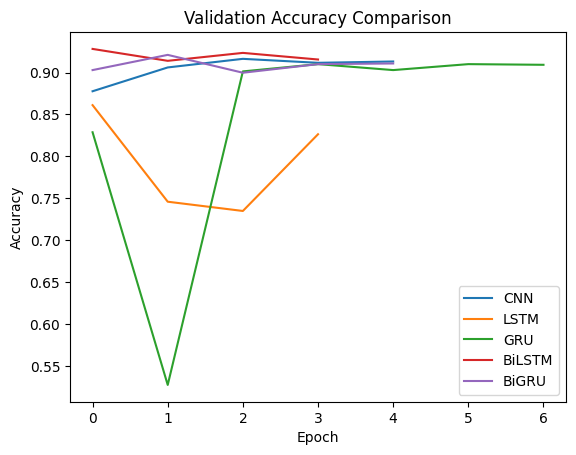

In [ ]:
import matplotlib.pyplot as plt
# after adding earlyStopping

def plot_accuracy(histories, names):
    for history, name in zip(histories, names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(
    [history_cnn, history_lstm, history_gru, history_bilstm, history_bigru],
    ['CNN', 'LSTM', 'GRU', 'BiLSTM', 'BiGRU']
)


In [ ]:
# # BERT Tokenization
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def tokenize_bert(texts, max_len=128):
#     return bert_tokenizer(
#         texts.tolist(),
#         padding='max_length',
#         truncation=True,
#         max_length=max_len,
#         return_tensors='tf'
#     )

# encoded = tokenize_bert(df1['clean_text'])

# # BERT Model
# def build_bert_model():
#     bert = TFBertModel.from_pretrained('bert-base-uncased')
#     input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name="input_ids")
#     attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

#     # ✅ FIX: Pass input as dictionary
#     outputs = bert({'input_ids': input_ids, 'attention_mask': attention_mask})
#     cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token
#     dense = tf.keras.layers.Dense(64, activation='relu')(cls_output)
#     dropout = tf.keras.layers.Dropout(0.3)(dense)
#     final = tf.keras.layers.Dense(1, activation='sigmoid')(dropout)

#     model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=final)
#     model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), metrics=['accuracy'])
#     return model


# Arabic Datasets

In [1]:
import kagglehub

# Download latest version
first_dataset_path = kagglehub.dataset_download("murtadhayaseen/arabic-fake-news-dataset-afnd")

print("Path to first dataset files:", first_dataset_path)

Path to first dataset files: /kaggle/input/arabic-fake-news-dataset-afnd


In [2]:
import kagglehub

# Download latest version
second_dataset_path = kagglehub.dataset_download("shyakanobledavid/david-ozil")

print("Path to second dataset files:", second_dataset_path)

Path to second dataset files: /kaggle/input/david-ozil


In [3]:
import os #os allows for performing tasks such as file manipulation, process management, and environment interaction
first_dataset_files=os.listdir(first_dataset_path)
print(first_dataset_files)
second_dataset_files=os.listdir(second_dataset_path)
print(second_dataset_files)

['AFND']
['fake_news_data.csv']


In [4]:
#for first dataset only

sub_dir = os.path.join(first_dataset_path, 'AFND')
sub_files = os.listdir(sub_dir)
print(sub_dir)
print(sub_files)
data_json_path = os.path.join(sub_dir, 'sources.json')

/kaggle/input/arabic-fake-news-dataset-afnd/AFND
['Dataset', 'README.md', 'sources.json']


# Parse JSON labels file:
**sources.json**

In [5]:
import json
import pandas as pd

#sub_dir contains base path
labels_json_path = os.path.join(sub_dir, 'sources.json')

# Load the JSON file
with open(labels_json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter sources
filtered_sources = {k: v for k, v in data.items() if v in ["credible", "not credible"]}

print(filtered_sources)

file_path = f'{sub_dir}/Dataset'

# Load articles
articles=[]
for source_id, label in filtered_sources.items():
    article_path = os.path.join(file_path, source_id, "scraped_articles.json")
    #ex: /kaggle/input/arabic-fake-news-dataset-afnd/AFND/Dataset/source_1/scraped_articles.json
    if os.path.exists(article_path):
        with open(article_path, "r", encoding="utf-8") as f:
            try:
                data = json.load(f) #consists of articles
                for article in data.get("articles", []):
                    if article.get("text"):  # Only keep articles with text
                        articles.append({
                            "text": article["text"],
                            "label": 1 if label == "credible" else 0 #ex:articles=[['text'='ghtfchh', 'label'=0]]
                        })
            except json.JSONDecodeError as e:
                print(f"Error decoding {article_path}: {e}")

# Create DataFrame
first_df = pd.DataFrame(articles)

# Optional: remove duplicates or empty entries
first_df.drop_duplicates(subset="text", inplace=True)
first_df.dropna(subset=["text", "label"], inplace=True)

first_df.head().style

{'source_1': 'credible', 'source_3': 'credible', 'source_4': 'credible', 'source_6': 'credible', 'source_7': 'not credible', 'source_8': 'not credible', 'source_9': 'not credible', 'source_10': 'not credible', 'source_11': 'not credible', 'source_12': 'credible', 'source_13': 'not credible', 'source_14': 'not credible', 'source_15': 'credible', 'source_16': 'not credible', 'source_17': 'not credible', 'source_18': 'credible', 'source_19': 'credible', 'source_20': 'not credible', 'source_21': 'credible', 'source_23': 'credible', 'source_25': 'not credible', 'source_27': 'not credible', 'source_28': 'not credible', 'source_29': 'not credible', 'source_30': 'not credible', 'source_31': 'not credible', 'source_32': 'not credible', 'source_33': 'credible', 'source_34': 'not credible', 'source_35': 'not credible', 'source_36': 'not credible', 'source_37': 'not credible', 'source_39': 'credible', 'source_40': 'not credible', 'source_41': 'not credible', 'source_42': 'not credible', 'source_44

,text,label
0,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من 20 سنة، ما بين 24 و28 ماي الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورة. وذكر بلاغ للجامعة الملكية المغربية لكرة القدم، أن هذا التجمع الاعدادي يدخل في إطار استعدادات النخبة الوطنية للمشاركة في البطولة العربية التي ستحتضنها مصر في الفترة المتراوحة ما بين 19 يونيو و3 يوليوز 2021. ولهذا الغرض، وجه السيد فتحي جمال، المشرف العام على المنتخب الوطني الدعوة إلى 24 لاعبا ويتعلق الأمر بكل من : 1- عبد الله بنتيك ......... أكاديمية محمد السادس 2- اسماعيل لغزالي ..... أكاديمية محمد السادس 3- أنس نناح ............... أكاديمية محمد السادس 4- محمد أمين السهل .. أكاديمية محمد السادس 5- حسن أكبوب ........... أكاديمية محمد السادس 6- عمر صادق .............. أكاديمية محمد السادس 7- عثمان شرايبي ........ أكاديمية محمد السادس 8- محمد راديد ............. أكاديمية محمد السادس 9- بدر أوهامي ............. النسمة السطاتية 10- عبد اللطيف المتطوع .... شباب الصخور السوداء 11- حسام بولاينين ........... الجيش الملكي 12- نوفل طاهيري ............ الجيش الملكي 13- أشرف لعزيري ........... الفتح الرياضي 14- مختار فريطس ........... الفتح الرياضي 15- المهدي موهوب ........ الفتح الرياضي 16- محمد كاسو ............. أولمبيك خريبكة 17- أنس عزيز ................ أولمبيك الدشيرة 18- حاتم السواح ............ الرجاء الرياضي 19- عبد الله أزرور............. الرجاء الرياضي 20- حمزة ولد الحاج ........ نهضة بركان 21- محمد مجاهيد .......... نهضة بركان 22- حمزة بارودي ........... نهضة بركان 23- ريان سيدي أحمد ..... اتحاد تواركة 24- نسيم زيبوك ............وداد فاس,1
1,"ترأس عبد القادر اعمارة، وزير التجهيز و النقل و اللوجيستك و الماء الجمعة الجلسة الافتتاحية للندوة الدولية عبر تقنية المناظرة المرئية حول موضوع السلامة الطرقية. وتأتي هذه الندوة حسب مانشره الوزير عبر صفحته الرسمية بموقع التواصل الاجتماعي ""فايسبوك""ضمن الفعاليات المنظمة من طرف وزارة التجهيز و النقل و اللوجيستك و الماء و الوكالة الوطنية للسلامة الطرقية في إطار الأسبوع السادس الذي تخلده الأمم المتحدة حول السلامة الطرقية 17-23 ماي تحت شعار ""شوارع للحياة # نحب 30"". وأكد في مداخلته على أهمية هذا الشعار في أفق تحديد السرعة في 30 كلمتر في الساعة على المستوى الدولي في المدارات الحضرية ذات الكثافة السكانية إعتبارا لكون الدراسات العلمية و الميدانية أظهرت ان السرعة عامل مسبب لحوادث السير و كذلك عامل مضاعف لها خاصة في المدارات الحضرية. كما إستعرض الوزير جهود المملكة المغربية في مجال الحد من حوادث السير. شارك في هذه الندوة بالإضافة إلى عدد من الخبراء المغاربة و الأجانب عدد من عمداء المدن المغربية و عدد من الفاعلين في المجتمع المدني.",1
2,"أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه برشلونة الاسباني بمسابقة الكأس المحلية كان ""نقطة تحو ل مهمة جدا "" في مقابلة نشرت في وسائل اعلام ارجنتينية السبت. وتحوم الشكوك حول مستقبل ""البرغوث الصغير"" الذي وصل عقده إلى نهايته مع ناديه الكاتالوني حيث ينتهي في 30 يونيو المقبل من دون أن يرشح أي شيء من الطرفين. ولم يتطرق ميسي في حديثه مع صحيفة ""أولي"" الارجنتينية الرياضية اليومية عن مستقبله، إلا انه تحدث بحماس عن الفوز الذي حققه برشلونة على أتلتيك بلباو برباعية نظيفة في نهائي الكأس في أبريل الماضي، وهو أول لقب للنادي منذ زهاء عامين. قال الارجنتيني الذي سيبلغ 34 عاما في 24 يونيو ""الحقيقة، هي أن كأس اسبانيا الاخيرة كانت مميزة كثيرا بسبب اللحظة التي كنا نمر بها. يخرج النادي من عامين سيئين"". وتابع مشيرا إلى الجيل الجديد للاعبي برشلونة ""غرف تبديل الملابس تضم العديد من اللاعبين الشبان والجدد. هذه الكأس كانت نقطة تحول مهمة جدا . وأكثر من ذلك، على الصعيد الشخصي أحب الفوز واحراز الألقاب. وكلما زاد العدد، كان ذلك أفضل"". وتأتي مقابلة ميسي عقب قرار برشلونة بعدم مشاركة ميسي في المباراة الاخيرة للفريق في الدوري السبت ضد مضيفه ايبار، لمنحه مزيدا من الراحة قبل نهائيات كوبا أميركا. وجاء في بيان على الموقع الرسمي للنادي ""ميسي لم يتمرن الجمعة بموافقة من المدرب ولن يكون مع المجموعة في المباراة ضد ايبار السبت"". وخاض ميسي 47 مباراة هذا الموسم مع برشلونة في جميع المسابقات سجل خلالها 38 هدفا ، ويتصدر ترتيب هدافي الليغا (30) قبل مرحلة من النهاية حيث ضمن بشكل كبير الفوز بجائزة بيتشيتشي للمرة الثامنة في مسيرته. وبعد ان بلغ عدد مبارياته مع برشلونة 778 هذا الموسم، تجاوز ميسي الرقم القياسي الذي حمله زميله السابق تشافي هرنانديس مدرب السد ال

In [6]:
print(first_df.sum)

<bound method DataFrame.sum of                                                      text  label
0       يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...      1
1       ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...      1
2       أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...      1
3       أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...      1
4       أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...      1
...                                                   ...    ...
374538  شدد مسؤول إيطالي اليوم الأربعاء على ضرورة التز...      1
374539  حذّر مركز الأزهر العالمي للفتوى الإلكرتونية، م...      1
374540  دافع الرئيس الروسي فلاديمير بوتين عن استضافة م...      1
374541  شعرت المستشارة الألمانية أنجيلا ميركل "بخيبة أ...      1
374542  انتهى مشوار أرتيم بيسيدين لاعب المنتخب الأوكرا...      1

[362821 rows x 2 columns]>


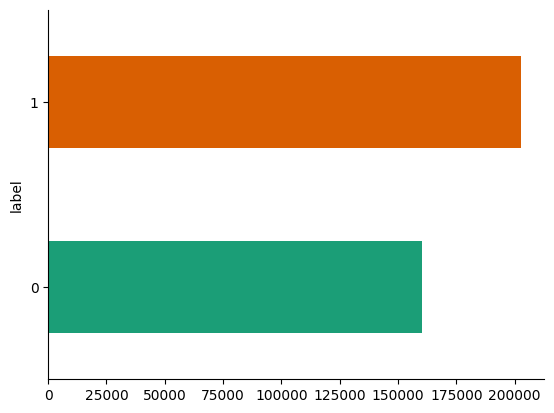

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
first_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
print(first_df['label'].value_counts()[1])
print(first_df['label'].value_counts()[0])

202488
160333


In [9]:
second_dataset_files
sec_df=pd.read_csv(os.path.join(second_dataset_path,'fake_news_data.csv'))
sec_df.head()


,Label,Topic,Article_content
0,real,politics,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,real,politics,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,real,politics,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,real,politics,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,real,politics,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [10]:
sec_df.rename(columns={'Article_content': 'text'},inplace=True)
sec_df.rename(columns={'Label': 'label'},inplace=True)
sec_df.drop(columns=['Topic'],inplace=True)

In [11]:
sec_df.loc[sec_df["label"] == "real", "label"] = 1
sec_df.loc[sec_df["label"] == "fake", "label"] = 0
sec_df.head()


,label,text
0,1,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,1,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,1,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,1,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,1,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


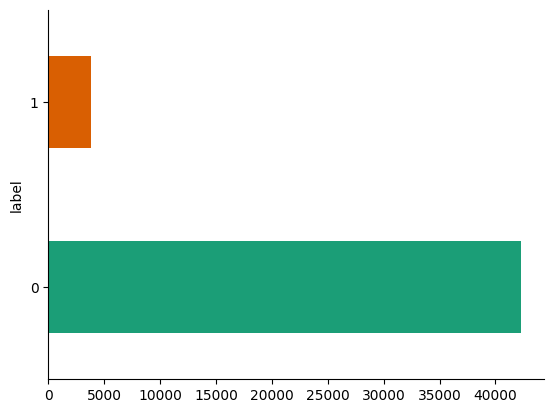

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sec_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
#MERGE THE TWO DATASETS
df_arabic = pd.concat([first_df, sec_df], ignore_index=True)

In [14]:
print(sec_df['label'].value_counts()[1])
print(sec_df['label'].value_counts()[0])

3854
42243


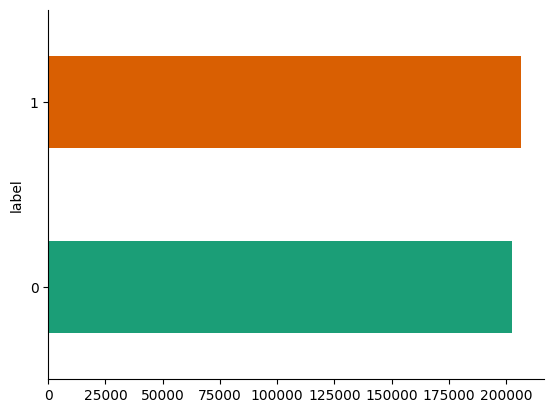

In [15]:
#after merging the 2 datasets
from matplotlib import pyplot as plt
import seaborn as sns
df_arabic.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
print(df_arabic['label'].value_counts()[1])
print(df_arabic['label'].value_counts()[0])

206342
202576


In [17]:
print(df_arabic.sum)

<bound method DataFrame.sum of                                                      text label
0       يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...     1
1       ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...     1
2       أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...     1
3       أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...     1
4       أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...     1
...                                                   ...   ...
408913             لم يعزف أندريه ريو موسيقى فيلم الرسالة     0
408914                  لم يعزف ياني موسيقى رأفت الهجَّان     0
408915                      وفاة الفنانة فيروز.. خبر زائف     0
408916             مايكل جاكسون يغني للحج.. حقيقة الفيديو     0
408917  دورة في الرقص الشرقي لفيفي عبده في السعودية.. ...     0

[408918 rows x 2 columns]>


In [18]:
print(df_arabic.iloc[362821]) #last row in first_df

text     القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
label                                                    1
Name: 362821, dtype: object


# Preprocess the Dataset

In [19]:
!pip install pyarabic


In [20]:
!pip install --upgrade pip setuptools wheel


In [21]:
!pip install camel-tools


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [22]:
import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("NLTK resources not found. Downloading...")
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True) # Add this download
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("NLTK resources downloaded.")

import re
import string
from pyarabic.araby import strip_tashkeel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load and filter Arabic stopwords
arabic_sw = set(stopwords.words('arabic'))
exceptions = {
    'لا','لم','لن','ليس','ما',
    'لكن','ولكن','بل','إلاّ',
    'إذا','إن','لو','لأنّ',
    'فقط','حتى',
    'من','ماذا','متى','أين','كيف','لماذا',
    'هذا','هذه','ذلك','تلك',
    'هو','هي','هم','نحن','أنا','أنتَ','أنتِ',
    'كل','بعض','أكثر','أقل'
}
filtered_sw = arabic_sw - exceptions

# Regex for tatweel (kashida)
KASHIDA_PATTERN = re.compile(r'ـ')

# Punctuation to remove (keep ؟, !, ")
arabic_punctuations = '''`÷×؛<>_*&^%][،/:'.{},~¦+|ch”…“–'''
english_punctuations = string.punctuation
punctuations_to_keep = ['؟', '!', '"']
all_punctuations = arabic_punctuations + english_punctuations
punctuations_removed = ''.join([p for p in all_punctuations if p not in punctuations_to_keep])
PUNCT_PATTERN = re.compile(f"[{re.escape(punctuations_removed)}]")

# Normalize, remove diacritics selectively, and filter stopwords
def normalize_arabic(text):
    # 1. Normalize basic letters
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'گ', 'ك', text)

    # 2. Remove tatweel
    text = KASHIDA_PATTERN.sub('', text)

    # 3. Remove English characters and digits
    text = re.sub(r'[A-Za-z0-9]', '', text)

    # 4. Remove punctuation (except ؟, !, ")
    text = PUNCT_PATTERN.sub('', text)

    # 5. Tokenize
    tokens = word_tokenize(text)

    # 6. Remove diacritics except on exception tokens
    cleaned_tokens = []
    for tok in tokens:
        if tok in exceptions:
            cleaned_tokens.append(tok)
        else:
            cleaned_tokens.append(strip_tashkeel(tok))

    # 7. Filter stopwords
    final_tokens = [t for t in cleaned_tokens if t and t not in filtered_sw]

    # 8. Return normalized text
    return ' '.join(final_tokens)

# Example usage on DataFrame 'df' with column 'text'
# df['clean_text'] = df['text'].apply(normalize_arabic)


In [23]:
!pip install camel-tools

In [24]:
!pip install --upgrade scikit-learn scipy numpy pandas

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camel-tools 1.5.6 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [25]:
!pip uninstall -y numpy scipy scikit-learn pandas
!pip install numpy scipy scikit-learn pandas --no-cache-dir

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 134.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 184.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 284.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 230.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

In [26]:
import nltk
import numpy
import scipy
#import sklearn
import pandas
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer
#from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
df_arabic['clean_text'] = df_arabic['text'].apply(normalize_arabic)
# df_arabic
row = df_arabic.loc[5]
print(row.to_string())

text          تناهز الكلفة المقدرة لمشروع بناء الطريق السيار...
label                                                         1
clean_text    تناهز الكلفه المقدره لمشروع بناء الطريق السيار...


In [28]:
# df
# string.punctuation
punctuations_removed

"`÷×؛<>_*&^%][،/:'.{},~¦+|ch”…“–#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"

In [29]:
# arabic_stopwords

In [30]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# # Optional: Arabic normalization
# from camel_tools.utils.dediac import dediac_ar
# from camel_tools.utils.normalize import normalize_alef_maksura_ar, normalize_teh_marbuta_ar, normalize_alef_ar

# def normalize_arabic(text):
#     text = dediac_ar(text)
#     text = normalize_alef_maksura_ar(text)
#     text = normalize_teh_marbuta_ar(text)
#     text = normalize_alef_ar(text)
#     return text

# # Load your dataset: must have 'text' and 'label' columns
# df = pd.read_csv('your_dataset.csv')  # label: 0=fake, 1=real

# # Normalize Arabic (optional for English)
# df['text'] = df['text'].apply(normalize_arabic)  # Skip for English

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# # ML Pipeline
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

# model = LogisticRegression()
# model.fit(X_train_vec, y_train)
# y_pred = model.predict(X_test_vec)

# print(classification_report(y_test, y_pred))


In [31]:
!camel_data --download morphology_db/calima-msa-r13


Usage:
    camel_data (-i | --install) [-f | --force] <PACKAGE>
    camel_data (-p | --post-install) <PACKAGE> <ARGS>...
    camel_data (-l | --list)
    camel_data (-u | --update)
    camel_data (-v | --version)
    camel_data (-h | --help)


In [32]:
import re
import nltk
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer
from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords
nltk.download('stopwords')

# Define important stopwords to KEEP
important_words =exceptions = {
    'لا','لم','لن','ليس','ما','ام'
    'لكن','ولكن','بل','إلاّ',
    'إذا','إن','لو','لأنّ',
    'فقط','حتى',
    'من','ماذا','متى','أين','كيف','لماذا',
    'هذا','هذه','ذلك','تلك',
    'هو','هي','هم','نحن','أنا','أنتَ','أنتِ',
    'كل','بعض','أكثر','أقل'
}

# Arabic stopwords from NLTK, removing the ones you want to keep
stopwords_ar = set(stopwords.words('arabic')) - important_words

# Initialize CAMeL Morphological Analyzer
db = MorphologyDB.builtin_db()
analyzer = Analyzer(db)

# Text normalization function
def normalize_arabic(text):
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)  # Remove diacritics
    text = re.sub(r'[إأآا]', 'ا', text)      # Normalize Alef
    text = re.sub(r'ى', 'ي', text)           # Normalize Ya
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    text = re.sub(r'ة', 'ه', text)           # Normalize Ta Marbuta
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

# Lemmatization function
def get_lemma(token):
    analyses = analyzer.analyze(token)
    if analyses:
        return analyses[0]['lemma']
    return token

# Full preprocessing pipeline with lemmatization
def preprocess_texts(texts):
    processed_texts = []

    for text in texts:
        # Step 1: Normalize
        text = normalize_arabic(text)

        # Step 2: Tokenize
        tokens = simple_word_tokenize(text)

        # Step 3: Lemmatization
        lemmas = [get_lemma(token) for token in tokens]

        # Step 4: Stopword Removal
        filtered = [word for word in lemmas if word not in stopwords_ar]

        # Join for vectorization
        processed_texts.append(' '.join(filtered))

    return processed_texts

# # Example input texts
# texts = [
#     "لماذا لا يذهب الطالب إلى المدرسة؟",
#     "الفتاة تدرس في الجامعة.",
#     "هل يمكن أن تنجح الخطة؟"
# ]

# # Apply preprocessing
# processed = preprocess_texts(texts)

# # Print outputs
# print("Processed Texts:", processed)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: '/root/.camel_tools/data/morphology_db/calima-msa-r13/morphology.db'

In [33]:
pip install transformers tensorflow


  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camel-tools 1.5.6 requires numpy<2, but you have numpy 2.0.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# from transformers import AutoTokenizer, TFAutoModel
# import tensorflow as tf

# # Arabic transformer models and their Hugging Face identifiers
# arabic_models = {
#     'AraBART': 'UBC-NLP/arabart',
#     'AraMarBERT': 'UBC-NLP/MARBERT',
#     'AraELECTRA': 'aubmindlab/araelectra-base-discriminator',
#     'ArabicBERT': 'asafaya/bert-base-arabic',
#     'ArabicT5': 'Voicelab-AI/arabic-t5-small'
# }

# # Load model and tokenizer
# def load_model_and_tokenizer(model_name):
#     tokenizer = AutoTokenizer.from_pretrained(model_name)
#     model = TFAutoModel.from_pretrained(model_name)
#     return tokenizer, model

# # Load each model
# loaded_models = {}
# for name, hf_name in arabic_models.items():
#     print(f"Loading {name}...")
#     tokenizer, model = load_model_and_tokenizer(hf_name)
#     loaded_models[name] = {'tokenizer': tokenizer, 'model': model}


In [ ]:
# pip install transformers datasets scikit-learn tensorflow


In [ ]:
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score,
#     mean_squared_error, mean_absolute_error, r2_score
# )
# import numpy as np
# import pandas as pd

# def compute_all_metrics(y_true, y_pred_probs, threshold=0.5):
#     y_pred = (y_pred_probs > threshold).astype(int)

#     metrics = {
#         'Accuracy': accuracy_score(y_true, y_pred),
#         'F1 Score': f1_score(y_true, y_pred),
#         'Precision': precision_score(y_true, y_pred),
#         'Recall': recall_score(y_true, y_pred),
#         'MSE': mean_squared_error(y_true, y_pred),
#         'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
#         'MAE': mean_absolute_error(y_true, y_pred),
#         'R² Score': r2_score(y_true, y_pred)
#     }
#     return metrics


In [ ]:
# y_true = df_test['label'].values  # binary labels (0 or 1)
# y_probs_marbert = marbert_model.predict(tokenized_input)['logits']  # shape: (n,1) or (n,2)

# # If logits are from softmax (multi-class)
# if y_probs_marbert.shape[1] == 2:
#     y_probs_marbert = tf.nn.softmax(y_probs_marbert, axis=1)[:, 1]  # probability of class 1

# metrics_marbert = compute_all_metrics(y_true, y_probs_marbert)


In [ ]:
# y_true = df_test['label'].values  # binary labels (0 or 1)
# y_probs_marbert = marbert_model.predict(tokenized_input)['logits']  # shape: (n,1) or (n,2)

# # If logits are from softmax (multi-class)
# if y_probs_marbert.shape[1] == 2:
#     y_probs_marbert = tf.nn.softmax(y_probs_marbert, axis=1)[:, 1]  # probability of class 1

# metrics_marbert = compute_all_metrics(y_true, y_probs_marbert)

In [34]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

# Arabic transformer models and their Hugging Face identifiers
arabic_models = {

    'AraMarBERT': 'UBC-NLP/MARBERT',
    'AraELECTRA': 'aubmindlab/araelectra-base-discriminator',
    'ArabicBERT': 'asafaya/bert-base-arabic',
    'ArabicT5': 'google/mt5-small'
}

# Load model and tokenizer
def load_model_and_tokenizer(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = TFAutoModel.from_pretrained(model_name)
    return tokenizer, model

# Load each model
loaded_models = {}
for name, hf_name in arabic_models.items():
    print(f"Loading {name}...")
    tokenizer, model = load_model_and_tokenizer(hf_name)
    loaded_models[name] = {'tokenizer': tokenizer, 'model': model}

Loading AraMarBERT...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at UBC-NLP/MARBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Loading AraELECTRA...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['electra.embeddings.position_ids', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further train

Loading ArabicBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
You are using the default legacy be

Loading ArabicT5...


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at google/mt5-small were not used when initializing TFMT5Model: ['

In [35]:
pip install transformers tensorflow torch sklearn pandas numpy

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data and select only 3000 samples
sample_size = 3000
df_arabic_sample = df_arabic.sample(n=sample_size, random_state=42)

# Extract texts and labels
texts = df_arabic_sample["clean_text"].tolist()
labels = df_arabic_sample["label"].tolist()

# Split data (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    texts,
    labels,
    test_size=0.2,  # 20% for temp (600 samples)
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # Split temp into 10% val (300) and 10% test (300)
    random_state=42
)

# Verify sizes
print(f"Training samples: {len(X_train)}")    # Should show 2400
print(f"Validation samples: {len(X_val)}")    # Should show 300
print(f"Test samples: {len(X_test)}")         # Should show 300

Training samples: 2400
Validation samples: 300
Test samples: 300


In [37]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Enable mixed precision for faster training + less RAM (if GPU available)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# -------------------------------------------------------------------
# STEP 1: Load Model (with fallback to smaller ArabERT if RAM crashes)
# -------------------------------------------------------------------
model_name = "UBC-NLP/MARBERT"  # Try this first (comment next line)
# model_name = "aubmindlab/bert-base-arabertv02"  # Uncomment if MARBERT crashes

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    # use_gradient_checkpointing=True  # Uncomment if RAM still crashes (slower but saves memory)
)

# -------------------------------------------------------------------
# STEP 2: Tokenize with Short Sequences (faster + less RAM)
# -------------------------------------------------------------------
max_length = 64  # Reduced from 128 for speed/memory

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)
val_encodings = tokenizer(
    X_val,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)

# -------------------------------------------------------------------
# STEP 3: Optimized Dataset Pipeline (prefetch for speed)
# -------------------------------------------------------------------
batch_size = 8  # Reduced from 32 for RAM, but still decent speed

train_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Critical to keep GPU busy
)

val_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val))
    .batch(batch_size)
)

# -------------------------------------------------------------------
# STEP 4: Compile & Train (with Adam optimizer)
# -------------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3  # Start small, increase later if needed
)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERT and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
 10/300 [>.............................] - ETA: 1:01:44 - loss: 0.8594 - accuracy: 0.4750

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict on test set
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128, return_tensors="tf")
predictions = model.predict(test_encodings)
pred_labels = tf.argmax(predictions.logits, axis=1)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, pred_labels))
print("F1:", f1_score(y_test, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs. validation accuracy/loss
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Enable mixed precision for faster training + less RAM (if GPU available)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# -------------------------------------------------------------------
# STEP 1: Load Model (with fallback to smaller ArabERT if RAM crashes)
# -------------------------------------------------------------------
model_name = "aubmindlab/araelectra-base-discriminator"  # Try this first (comment next line)
# model_name = "aubmindlab/bert-base-arabertv02"  # Uncomment if MARBERT crashes

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    # use_gradient_checkpointing=True  # Uncomment if RAM still crashes (slower but saves memory)
)

# -------------------------------------------------------------------
# STEP 2: Tokenize with Short Sequences (faster + less RAM)
# -------------------------------------------------------------------
max_length = 64  # Reduced from 128 for speed/memory

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)
val_encodings = tokenizer(
    X_val,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)

# -------------------------------------------------------------------
# STEP 3: Optimized Dataset Pipeline (prefetch for speed)
# -------------------------------------------------------------------
batch_size = 8  # Reduced from 32 for RAM, but still decent speed

train_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Critical to keep GPU busy
)

val_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val))
    .batch(batch_size)
)

# -------------------------------------------------------------------
# STEP 4: Compile & Train (with Adam optimizer)
# -------------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3  # Start small, increase later if needed
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict on test set
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128, return_tensors="tf")
predictions = model.predict(test_encodings)
pred_labels = tf.argmax(predictions.logits, axis=1)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, pred_labels))
print("F1:", f1_score(y_test, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs. validation accuracy/loss
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Enable mixed precision for faster training + less RAM (if GPU available)
tf.keras.mixed_precision.set_global_policy('mixed_float16')


# -------------------------------------------------------------------
# STEP 1: Load Model (with fallback to smaller ArabERT if RAM crashes)
# -------------------------------------------------------------------
model_name = "asafaya/bert-base-arabic"  # Try this first (comment next line)
# model_name = "aubmindlab/bert-base-arabertv02"  # Uncomment if MARBERT crashes

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    # use_gradient_checkpointing=True  # Uncomment if RAM still crashes (slower but saves memory)
)

# -------------------------------------------------------------------
# STEP 2: Tokenize with Short Sequences (faster + less RAM)
# -------------------------------------------------------------------
max_length = 64  # Reduced from 128 for speed/memory

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)
val_encodings = tokenizer(
    X_val,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)

# -------------------------------------------------------------------
# STEP 3: Optimized Dataset Pipeline (prefetch for speed)
# -------------------------------------------------------------------
batch_size = 8  # Reduced from 32 for RAM, but still decent speed

train_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Critical to keep GPU busy
)

val_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val))
    .batch(batch_size)
)

# -------------------------------------------------------------------
# STEP 4: Compile & Train (with Adam optimizer)
# -------------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3  # Start small, increase later if needed
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict on test set
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128, return_tensors="tf")
predictions = model.predict(test_encodings)
pred_labels = tf.argmax(predictions.logits, axis=1)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, pred_labels))
print("F1:", f1_score(y_test, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs. validation accuracy/loss
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Enable mixed precision for faster training + less RAM (if GPU available)
tf.keras.mixed_precision.set_global_policy('mixed_float16')


# -------------------------------------------------------------------
# STEP 1: Load Model (with fallback to smaller ArabERT if RAM crashes)
# -------------------------------------------------------------------
model_name = "ArabicT5': 'google/mt5-small"  # Try this first (comment next line)
# model_name = "aubmindlab/bert-base-arabertv02"  # Uncomment if MARBERT crashes

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    # use_gradient_checkpointing=True  # Uncomment if RAM still crashes (slower but saves memory)
)

# -------------------------------------------------------------------
# STEP 2: Tokenize with Short Sequences (faster + less RAM)
# -------------------------------------------------------------------
max_length = 64  # Reduced from 128 for speed/memory

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)
val_encodings = tokenizer(
    X_val,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors="tf"
)

# -------------------------------------------------------------------
# STEP 3: Optimized Dataset Pipeline (prefetch for speed)
# -------------------------------------------------------------------
batch_size = 8  # Reduced from 32 for RAM, but still decent speed

train_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Critical to keep GPU busy
)

val_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val))
    .batch(batch_size)
)

# -------------------------------------------------------------------
# STEP 4: Compile & Train (with Adam optimizer)
# -------------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3  # Start small, increase later if needed
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict on test set
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128, return_tensors="tf")
predictions = model.predict(test_encodings)
pred_labels = tf.argmax(predictions.logits, axis=1)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, pred_labels))
print("F1:", f1_score(y_test, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs. validation accuracy/loss
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()